In [11]:
from naive_solver import NaiveSolver
from long_solver import LongSolver
from solver import Solver
from graph import Graph

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def generateData():
    res = list()
    
    for n in range(5, 18):
        print(n)
        fail_num = 0
        for i in range(5):
            for density in range(10):
                matrix = np.random.randint(low=0, high=density+2, size=(n, n))
                graph = Graph(n, adjacencyMatrix=matrix)
                slv = Solver(graph)
                long_slv = LongSolver(graph)
                n_slv = NaiveSolver(graph)

                x, y, cut = slv.solve()
                x_long, y_long, cut_long = long_slv.solve()
                x_n, y_n, cut_n = n_slv.solve()

                res.append([cut, cut_long, cut_n])
            
            
            
    return np.array(res)

In [22]:
data = generateData()

5
6
7
8
9
10
11
12
13
14
15
16
17


In [24]:
sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina" 

In [25]:
print(data)

[[  5   5   0]
 [  6   9   4]
 [ 13  14   5]
 ...
 [334 359 247]
 [358 402 307]
 [435 451 174]]


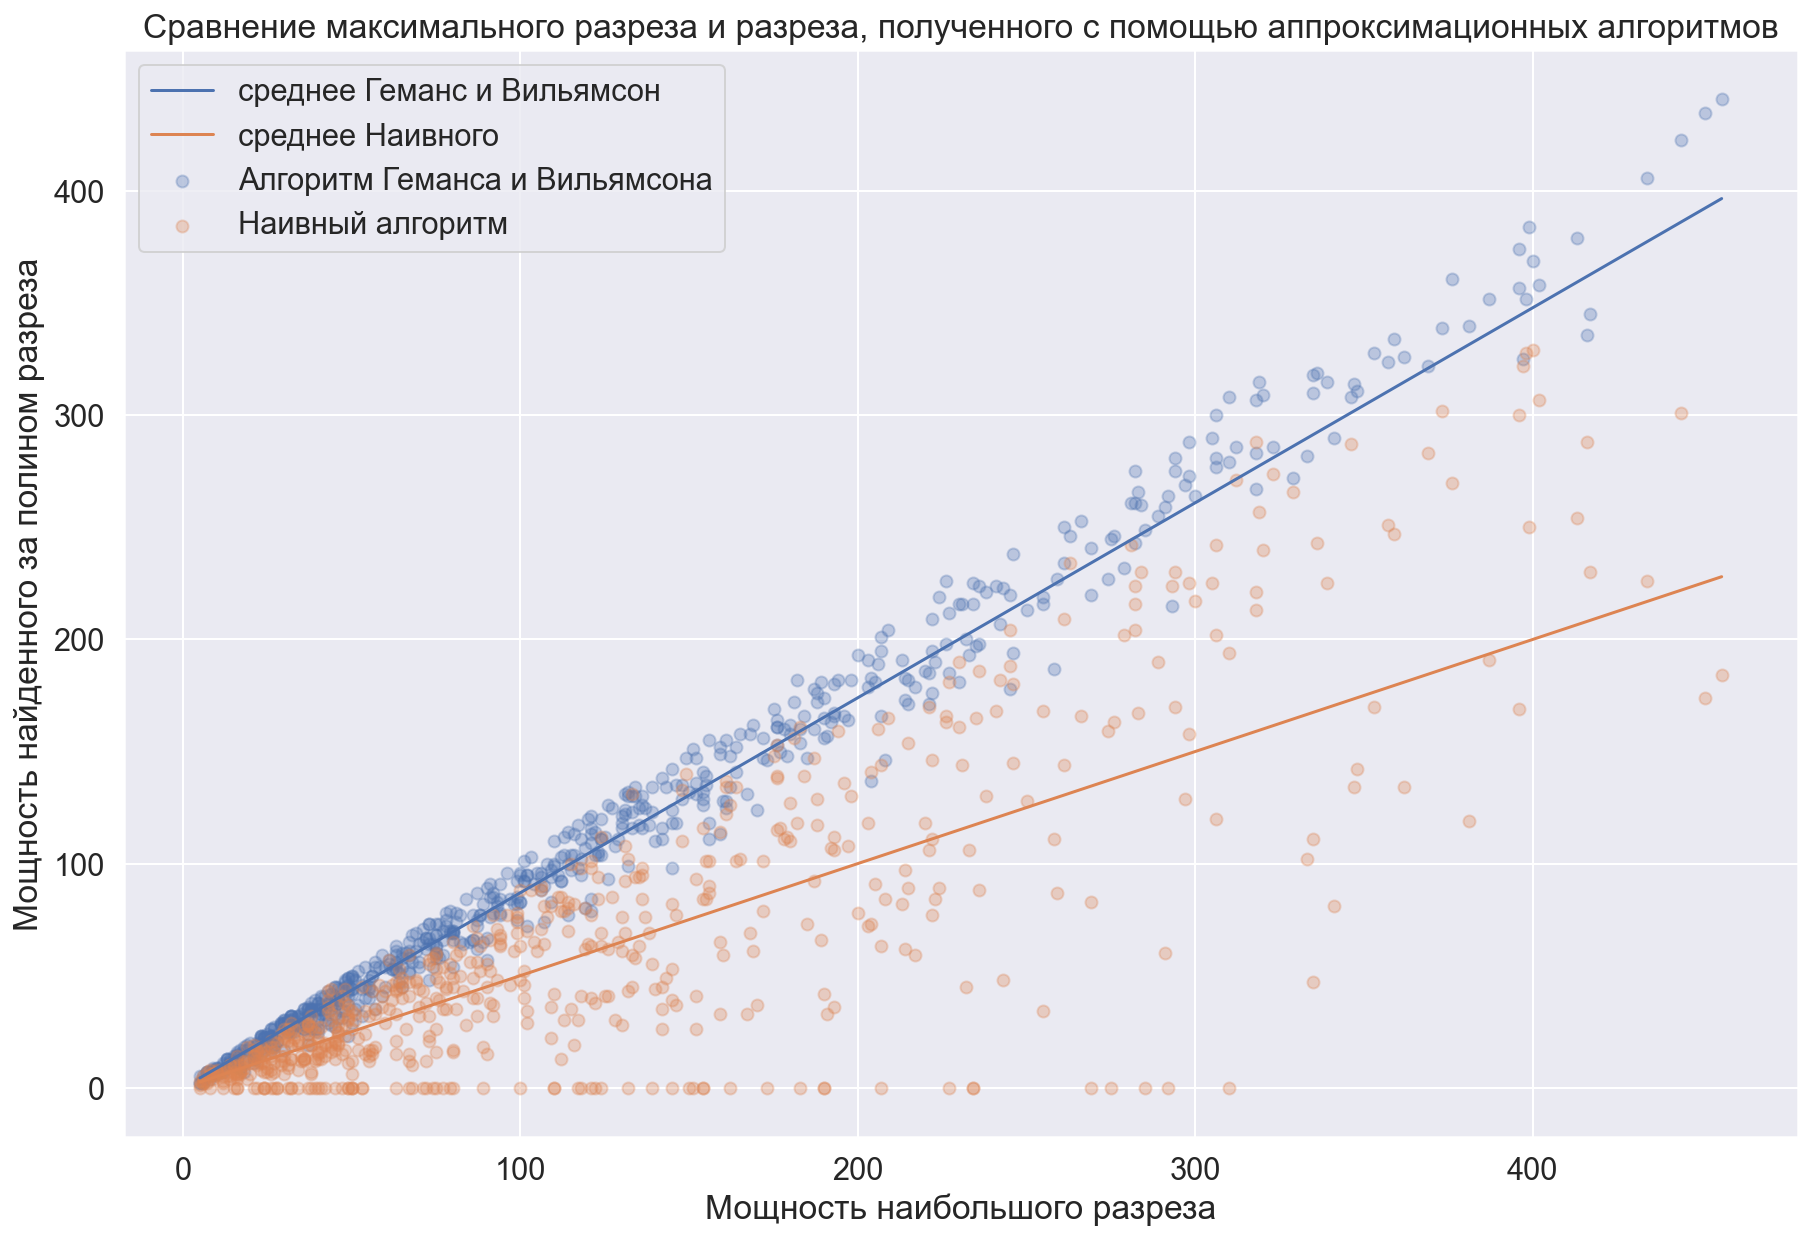

In [33]:
plt.figure(figsize=(15,10))
plt.title("Сравнение максимального разреза и разреза, полученного с помощью аппроксимационных алгоритмов")

alpha1 = 0.87
alpha2 = 0.5
grid = np.linspace(start = np.min(data[:, 1]), stop= np.max(data[:, 1]), num=1000)

plt.plot(grid, grid*alpha1, label="среднее Геманс и Вильямсон")
plt.plot(grid, grid*alpha2, label="среднее Наивного")

plt.scatter(data[:, 1], data[:, 0], label="Алгоритм Геманса и Вильямсона", alpha=0.3)
plt.scatter(data[:, 1], data[:, 2], label="Наивный алгоритм", alpha=0.3)
plt.legend()
plt.xlabel("Мощность наибольшого разреза")
plt.ylabel("Мощность найденного за полином разреза")
plt.show()
